# How to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups.

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "arrhythmia.data"
df = pd.read_csv(path, header = None)
df.head()

0    1    2    3    4    5    6    7    8    9    ...  270   271  272  273  \
0   75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0 -0.9  0.0   
1   56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5  0.0  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5 -2.4  0.0   
3   55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2 -2.2  0.0   
4   75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1 -3.6  0.0   

   274  275  276   277   278  279  
0  0.0  0.9  2.9  23.3  49.4    8  
1  0.0  0.2  2.1  20.4  38.8    6  
2  0.0  0.3  3.4  12.3  49.0   10  
3  0.0  0.4  2.6  34.6  61.6    1  
4  0.0 -0.1  3.9  25.4  62.8    7  

[5 rows x 280 columns]

In [3]:
_headers = ["Age", "Sex", "Height", "Weight", "QRS duration", "P-R interval", "Q-T interval", "T interval", " P interval", "QRS", "T", "P", "QRST", "j", "Heart rate", "Q wave", "R wave", "S wave", "R' wave", "S' wave", "Number of intrinsic deflections", "Existence of ragged R wave"];

In [4]:
headers = ['1 Age','2 Sex','3 Height','4 Weight','5 QRS duration','6 P-R interval','7 Q-T interval','8 T interval','9 P interval','10 QRS','11 T','12 P','13 QRST','14 J','15 Heart rate','16 DI Q Wave','17 DI R wave','18 DI S wave','19 DI R\'wave','20 DI S\'wave','21 DI Number of intrinsic deflections','22 DI Existence of ragged R wave','23 DI Existence of diphasic derivation of R wave','24 DI Existence of ragged P wave','25 DI Existence of diphasic derivation of P wave','26 DI Existence of ragged T wave','27 DI Existence of diphasic derivation of T wave'   ,'28 DII Q Wave','29 DII R wave','30 DII S wave','31 DII R\'wave','32 DII S\'wave','33 DII Number of intrinsic deflections','34 DII Existence of ragged R wave','35 DII Existence of DIIphasic derivation of R wave','36 DII Existence of ragged P wave','37 DII Existence of diphasic derivation of P wave','38 DII Existence of ragged T wave','39 DII Existence of diphasic derivation of T wave', '40 DIII Q Wave','41 DIII R wave','42 DIII S wave','43 DIII R\'wave','44 DIII S\'wave','45 DIII Number of intrinsic deflections','46 DIII Existence of ragged R wave','47 DIII Existence of DIIIphasic derivation of R wave','48 DIII Existence of ragged P wave','49 DIII Existence of diphasic derivation of P wave','50 DIII Existence of ragged T wave','51 DIII Existence of diphasic derivation of T wave'   ,'52 AVR Q Wave','53 AVR R wave','54 AVR S wave','55 AVR R\'wave','56 AVR S\'wave','57 AVR Number of intrinsic deflections',   '58 AVR Existence of ragged R wave','59 AVR Existence of diphasic derivation of R wave','60 AVR Existence of ragged P wave','61 AVR Existence of diphasic derivation of P wave','62 AVR Existence of ragged T wave','63 AVR Existence of diphasic derivation of T wave' ,'64 AVL Q Wave','65 AVL R wave','66 AVL S wave','67 AVL R\'wave','68 AVL S\'wave','69 AVL Number of intrinsic deflections','70 AVL Existence of ragged R wave','71 AVL Existence of AVLphasic derivation of R wave','72 AVL Existence of ragged P wave','73 AVL Existence of diphasic derivation of P wave','74 AVL Existence of ragged T wave','75 AVL Existence of diphasic derivation of T wave'   ,'76 AVF Q Wave','77 AVF R wave','78 AVF S wave','79 AVF R\'wave','80 AVF S\'wave','81 AVF Number of intrinsic deflections','82 AVF Existence of ragged R wave','83 AVF Existence of AVFphasic derivation of R wave','84 AVF Existence of ragged P wave','85 AVF Existence of diphasic derivation of P wave','86 AVF Existence of ragged T wave','87 AVF Existence of diphasic derivation of T wave'   ,'88 V1 Q Wave','89 V1 R wave','90 V1 S wave','91 V1 R\'wave','92 V1 S\'wave','93 V1 Number of intrinsic deflections','94 V1 Existence of ragged R wave','95 V1 Existence of V1phasic derivation of R wave','96 V1 Existence of ragged P wave','97 V1 Existence of diphasic derivation of P wave','98 V1 Existence of ragged T wave','99 V1 Existence of diphasic derivation of T wave'   ,'100 v2 Q Wave','101 v2 R wave','102 v2 S wave','103 v2 R\'wave','104 v2 S\'wave','105 v2 Number of intrinsic deflections','106 v2 Existence of ragged R wave','107 v2 Existence of diphasic derivation of R wave','108 v2 Existence of ragged P wave','109 v2 Existence of diphasic derivation of P wave','110 v2 Existence of ragged T wave','111 v2 Existence of diphasic derivation of T wave'   ,'112 V3 Q Wave','113 V3 R wave','114 V3 S wave','115 V3 R\'wave','116 V3 S\'wave','117 V3 Number of intrinsic deflections','118 V3 Existence of ragged R wave','119 V3 Existence of V3phasic derivation of R wave','120 V3 Existence of ragged P wave','121 V3 Existence of diphasic derivation of P wave','122 V3 Existence of ragged T wave','123 V3 Existence of diphasic derivation of T wave'  ,'124 V4 Q Wave','125 V4 R wave','126 V4 S wave','127 V4 R\'wave','128 V4 S\'wave','129 V4 Number of intrinsic deflections','130 V4 Existence of ragged R wave','131 V4 Existence of V4phasic derivation of R wave','132 V4 Existence of ragged P wave','133 V4 Existence of diphasic derivation of P wave','134 V4 Existence of ragged T wave','135 V4 Existence of diphasic derivation of T wave'  ,'136 V5 Q Wave','137 V5 R wave','138 V5 S wave','139 V5 R\'wave','140 V5 S\'wave','141 V5 Number of intrinsic deflections','142 V5 Existence of ragged R wave','143 V5 Existence of diphasic derivation of R wave','144 V5 Existence of ragged P wave','145 V5 Existence of diphasic derivation of P wave','146 V5 Existence of ragged T wave','147 V5 Existence of diphasic derivation of T wave'   ,'148 V6 Q Wave','149 V6 R wave', '150 V6 S wave','151 V6 R\' wave','152 V6 S\' wave','153 V6 Number of intinsic deflections','154 V6 Existence of ragged R wave','155 V6 Existence of diphasic derivation of R wave','156 V6 Existence of ragged P wave','157 V6 Existence of diphasic derivation of P wave', '158 V6 Existence of ragged T wave', '159 V6 Existence of diphasic derivation of T wave', '160 DI JJ wave','161 DI Q waves' ,'162 DI R waves' ,'163 DI S waves' ,'164 DI R\' waves' , '165 DI S\' waves' , '166 DI P waves' , '167 DI T waves' , '168 DI QRSA' ,'169 DI QRSTA', '170 DII jj waves' , ' 171 DII Q waves' , '172 DII R waves' , '173 DII S waves' , '174 DII R\' waves' , '175 DII S\' waves' , '176 DII P waves' , '177 DII T waves' , '178 DII QRSA' , '179 DII QRSTA' , '180 DIII jj waves' , '181 DIII Q waves' , '182 DIII R waves' , '183 DIII S waves' ,'184 DIII R\' waves' , '185 DIII S\' waves' , '186 DIII P waves' , '187 DIII T waves' , '188 DIII QRSA' , '189 DIII QRSTA', '190 AVR jj waves' , '191 AVR Q waves' , '192 AVR R waves' , '193 AVR S waves' , '194 AVR R\' waves' , '195 AVR S\' waves' , '196 AVR P waves' , '197 AVR T waves' , '198 AVR QRSA' , '199 AVR QRSTA' , '200 AVL jj waves' , '201 AVL Q waves' , '202 AVL R waves' , '203 AVL S waves' , '204 AVL R\' waves' , '205 AVL S\ waves' , '206 AVL P waves' , '207 AVL T waves' , '208 AVL QRSA' , '209 AVL QRSTA' ,'210 AVF jj waves' , '211 AVF Q waves' , '212 AVF R waves' , '213 AVF S waves' , '214 AVF R\' waves' , '215 AVF S\' waves' , '216 AVF P waves' , '217 AVF T waves' , '218 AVF QRSA' , '219 AVF QRSTA' , '220 V1 jj waves' , '221 V1 Q waves' ,'222 V1 R waves' , '223 V1 S waves' , '224 V1 R\' waves' , '225 V1 S\' waves' , '226 V1 P waves' , '227 V1 T waves' , '228 V1 QRSA' , '229 V1 QRSTA' , '230 V2 jj waves' , '231 V2 Q waves' , '232 V2 R waves' ,  '233 V2 S waves' , '234 V2 R\' waves' , '235 V2 S\' waves' ,'236 V2 P waves' ,'237 V2 T waves' , '238 V2 QRSA' , '239 V2 QRSTA' , '240 V3 jj waves' , '241 V3 Q waves' , '242 V3 R waves' , '243 V3 S waves' , '244 V3 R\' waves' , '245 V3 S\' waves' , '246 V3 P waves' , '247 V3 T waves' , '248 V3 QRSA' , '249 V3 QRSTA' , '250 V4 jj waves' , '251 V4 Q waves' , '252 V4 R waves' , '253 V4 S waves' , '254 V4 R\' waves' , '255 V4 S\' waves' , '256 V4 P waves' , '257 V4 T waves' , '258 V4 QRSA' , '259 V4 QRSTA' ,'260 V5 jj waves' , '261 V5 Q waves' , '262 V5 R waves' , '263 V5 S waves' , '264 V5 R\' waves' , '265 V5 S\' waves' , '266 V5 P waves' , '267 V5 T waves' , '268 V5 QRSA' , '269 V5 QRSTA' , '270 V6 jj waves' , '271 V6 Q waves' , '272 V6 R waves' , '273 V6 S waves' , '274 V6 R\' waves' , '275 V6 S\' waves' , '276 V6 P waves' , '277 V6 T waves' , '278 V6 QRSA' , '279 V6 QRSTA', '280 Diagnosis'];

In [5]:
 headers
    

['1 Age',
 '2 Sex',
 '3 Height',
 '4 Weight',
 '5 QRS duration',
 '6 P-R interval',
 '7 Q-T interval',
 '8 T interval',
 '9 P interval',
 '10 QRS',
 '11 T',
 '12 P',
 '13 QRST',
 '14 J',
 '15 Heart rate',
 '16 DI Q Wave',
 '17 DI R wave',
 '18 DI S wave',
 "19 DI R'wave",
 "20 DI S'wave",
 '21 DI Number of intrinsic deflections',
 '22 DI Existence of ragged R wave',
 '23 DI Existence of diphasic derivation of R wave',
 '24 DI Existence of ragged P wave',
 '25 DI Existence of diphasic derivation of P wave',
 '26 DI Existence of ragged T wave',
 '27 DI Existence of diphasic derivation of T wave',
 '28 DII Q Wave',
 '29 DII R wave',
 '30 DII S wave',
 "31 DII R'wave",
 "32 DII S'wave",
 '33 DII Number of intrinsic deflections',
 '34 DII Existence of ragged R wave',
 '35 DII Existence of DIIphasic derivation of R wave',
 '36 DII Existence of ragged P wave',
 '37 DII Existence of diphasic derivation of P wave',
 '38 DII Existence of ragged T wave',
 '39 DII Existence of diphasic derivation 

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.columns = headers
df.head()

1 Age  2 Sex  3 Height  4 Weight  5 QRS duration  6 P-R interval  \
0     75      0       190        80              91             193   
1     56      1       165        64              81             174   
2     54      0       172        95             138             163   
3     55      0       175        94             100             202   
4     75      0       190        80              88             181   

   7 Q-T interval  8 T interval  9 P interval  10 QRS 11 T 12 P 13 QRST 14 J  \
0             371           174           121     -16   13   64      -2    ?   
1             401           149            39      25   37  -17      31    ?   
2             386           185           102      96   34   70      66   23   
3             380           179           143      28   11   -5      20    ?   
4             360           177           103     -16   13   61       3    ?   

  15 Heart rate  16 DI Q Wave  17 DI R wave  18 DI S wave  19 DI R'wave  \
0            63             0            52            44             0   
1            53             0            48             0             0   
2            75             0            40            80             0   
3            71             0            72            20             0   
4             ?             0            48            40             0   

   20 DI S'wave  21 DI Number of intrinsic deflections  \
0             0                                     32   
1             0                                     24   
2             0                                     24   
3             0                                     48   
4             0                                     28   

   22 DI Existence of ragged R wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   23 DI Existence of diphasic derivation of R wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   24 DI Existence of ragged P wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   25 DI Existence of diphasic derivation of P wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   26 DI Existence of ragged T wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   27 DI Existence of diphasic derivation of T wave  28 DII Q Wave  \
0                                                 0              0   
1                                                 0              0   
2                                                 0             20   
3                                                 0              0   
4                                                 0              0   

   29 DII R wave  30 DII S wave  31 DII R'wave  32 DII S'wave  \
0             44             20             36              0   
1             64              0              0              0   
2             56             52              0              0   
3             64             36              0              0   
4             40             24              0              0   

   33 DII Number of intrinsic deflections  34 DII Existence of ragged R wave  \
0                                   

In [6]:
df.replace("?", np.nan, inplace = True)
df.isnull().sum()

1 Age                                                     0
2 Sex                                                     0
3 Height                                                  0
4 Weight                                                  0
5 QRS duration                                            0
6 P-R interval                                            0
7 Q-T interval                                            0
8 T interval                                              0
9 P interval                                              0
10 QRS                                                    0
11 T                                                      8
12 P                                                     22
13 QRST                                                   1
14 J                                                    376
15 Heart rate                                             1
16 DI Q Wave                                              0
17 DI R wave                            

### Droping column no 14 J as we have 376 missing values out of 452
### Replacing missing value of  columns T, P, QRST and Heart rate with mean value

In [7]:
df.head()

1 Age  2 Sex  3 Height  4 Weight  5 QRS duration  6 P-R interval  \
0     75      0       190        80              91             193   
1     56      1       165        64              81             174   
2     54      0       172        95             138             163   
3     55      0       175        94             100             202   
4     75      0       190        80              88             181   

   7 Q-T interval  8 T interval  9 P interval  10 QRS 11 T 12 P 13 QRST 14 J  \
0             371           174           121     -16   13   64      -2  NaN   
1             401           149            39      25   37  -17      31  NaN   
2             386           185           102      96   34   70      66   23   
3             380           179           143      28   11   -5      20  NaN   
4             360           177           103     -16   13   61       3  NaN   

  15 Heart rate  16 DI Q Wave  17 DI R wave  18 DI S wave  19 DI R'wave  \
0            63             0            52            44             0   
1            53             0            48             0             0   
2            75             0            40            80             0   
3            71             0            72            20             0   
4           NaN             0            48            40             0   

   20 DI S'wave  21 DI Number of intrinsic deflections  \
0             0                                     32   
1             0                                     24   
2             0                                     24   
3             0                                     48   
4             0                                     28   

   22 DI Existence of ragged R wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   23 DI Existence of diphasic derivation of R wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   24 DI Existence of ragged P wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   25 DI Existence of diphasic derivation of P wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   26 DI Existence of ragged T wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   27 DI Existence of diphasic derivation of T wave  28 DII Q Wave  \
0                                                 0              0   
1                                                 0              0   
2                                                 0             20   
3                                                 0              0   
4                                                 0              0   

   29 DII R wave  30 DII S wave  31 DII R'wave  32 DII S'wave  \
0             44             20             36              0   
1             64              0              0              0   
2             56             52              0              0   
3             64             36              0              0   
4             40             24              0              0   

   33 DII Number of intrinsic deflections  34 DII Existence of ragged R wave  \
0                                   

In [8]:
df.dtypes

1 Age                                                     int64
2 Sex                                                     int64
3 Height                                                  int64
4 Weight                                                  int64
5 QRS duration                                            int64
6 P-R interval                                            int64
7 Q-T interval                                            int64
8 T interval                                              int64
9 P interval                                              int64
10 QRS                                                    int64
11 T                                                     object
12 P                                                     object
13 QRST                                                  object
14 J                                                     object
15 Heart rate                                            object
16 DI Q Wave                            

In [9]:
df = df.drop(['14 J'], axis = 1)
df.head()

1 Age  2 Sex  3 Height  4 Weight  5 QRS duration  6 P-R interval  \
0     75      0       190        80              91             193   
1     56      1       165        64              81             174   
2     54      0       172        95             138             163   
3     55      0       175        94             100             202   
4     75      0       190        80              88             181   

   7 Q-T interval  8 T interval  9 P interval  10 QRS 11 T 12 P 13 QRST  \
0             371           174           121     -16   13   64      -2   
1             401           149            39      25   37  -17      31   
2             386           185           102      96   34   70      66   
3             380           179           143      28   11   -5      20   
4             360           177           103     -16   13   61       3   

  15 Heart rate  16 DI Q Wave  17 DI R wave  18 DI S wave  19 DI R'wave  \
0            63             0            52            44             0   
1            53             0            48             0             0   
2            75             0            40            80             0   
3            71             0            72            20             0   
4           NaN             0            48            40             0   

   20 DI S'wave  21 DI Number of intrinsic deflections  \
0             0                                     32   
1             0                                     24   
2             0                                     24   
3             0                                     48   
4             0                                     28   

   22 DI Existence of ragged R wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   23 DI Existence of diphasic derivation of R wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   24 DI Existence of ragged P wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   25 DI Existence of diphasic derivation of P wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   26 DI Existence of ragged T wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   27 DI Existence of diphasic derivation of T wave  28 DII Q Wave  \
0                                                 0              0   
1                                                 0              0   
2                                                 0             20   
3                                                 0              0   
4                                                 0              0   

   29 DII R wave  30 DII S wave  31 DII R'wave  32 DII S'wave  \
0             44             20             36              0   
1             64              0              0              0   
2             56             52              0              0   
3             64             36              0              0   
4             40             24              0              0   

   33 DII Number of intrinsic deflections  34 DII Existence of ragged R wave  \
0                                      28                         

In [10]:
df["15 Heart rate"] = pd.to_numeric(df["15 Heart rate"])
df["11 T"] = pd.to_numeric(df["11 T"])
df["12 P"] = pd.to_numeric(df["12 P"])
df["13 QRST"] = pd.to_numeric(df["13 QRST"])
df.dtypes

1 Age                                                     int64
2 Sex                                                     int64
3 Height                                                  int64
4 Weight                                                  int64
5 QRS duration                                            int64
6 P-R interval                                            int64
7 Q-T interval                                            int64
8 T interval                                              int64
9 P interval                                              int64
10 QRS                                                    int64
11 T                                                    float64
12 P                                                    float64
13 QRST                                                 float64
15 Heart rate                                           float64
16 DI Q Wave                                              int64
17 DI R wave                            

In [11]:
mean_HR = df['15 Heart rate'].mean()
mean_T = df['11 T'].mean() 
mean_P = df['12 P'].mean()
mean_QRST = df['13 QRST'].mean()
mean_HR
mean_T
mean_P
mean_QRST
print("mean_HR ", mean_HR, " mean_T ", mean_T, " mean_P ",mean_P, " mean_QRST ", mean_QRST )

mean_HR  74.46341463414635  mean_T  36.1509009009009  mean_P  48.913953488372094  mean_QRST  36.71618625277162


In [12]:
df["15 Heart rate"].replace(np.nan, mean_HR, inplace=True)
df["11 T"].replace(np.nan, mean_HR, inplace=True)
df["12 P"].replace(np.nan, mean_HR, inplace=True)
df["13 QRST"].replace(np.nan, mean_HR, inplace=True)
df.head()

1 Age  2 Sex  3 Height  4 Weight  5 QRS duration  6 P-R interval  \
0     75      0       190        80              91             193   
1     56      1       165        64              81             174   
2     54      0       172        95             138             163   
3     55      0       175        94             100             202   
4     75      0       190        80              88             181   

   7 Q-T interval  8 T interval  9 P interval  10 QRS  11 T  12 P  13 QRST  \
0             371           174           121     -16  13.0  64.0     -2.0   
1             401           149            39      25  37.0 -17.0     31.0   
2             386           185           102      96  34.0  70.0     66.0   
3             380           179           143      28  11.0  -5.0     20.0   
4             360           177           103     -16  13.0  61.0      3.0   

   15 Heart rate  16 DI Q Wave  17 DI R wave  18 DI S wave  19 DI R'wave  \
0      63.000000             0            52            44             0   
1      53.000000             0            48             0             0   
2      75.000000             0            40            80             0   
3      71.000000             0            72            20             0   
4      74.463415             0            48            40             0   

   20 DI S'wave  21 DI Number of intrinsic deflections  \
0             0                                     32   
1             0                                     24   
2             0                                     24   
3             0                                     48   
4             0                                     28   

   22 DI Existence of ragged R wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   23 DI Existence of diphasic derivation of R wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   24 DI Existence of ragged P wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   25 DI Existence of diphasic derivation of P wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   26 DI Existence of ragged T wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   27 DI Existence of diphasic derivation of T wave  28 DII Q Wave  \
0                                                 0              0   
1                                                 0              0   
2                                                 0             20   
3                                                 0              0   
4                                                 0              0   

   29 DII R wave  30 DII S wave  31 DII R'wave  32 DII S'wave  \
0             44             20             36              0   
1             64              0              0              0   
2             56             52              0              0   
3             64             36              0              0   
4             40             24              0              0   

   33 DII Number of intrinsic deflections  34 DII Existence of ragged R wave  \
0                                      28 

In [13]:
df.isnull().sum()

1 Age                                                   0
2 Sex                                                   0
3 Height                                                0
4 Weight                                                0
5 QRS duration                                          0
6 P-R interval                                          0
7 Q-T interval                                          0
8 T interval                                            0
9 P interval                                            0
10 QRS                                                  0
11 T                                                    0
12 P                                                    0
13 QRST                                                 0
15 Heart rate                                           0
16 DI Q Wave                                            0
17 DI R wave                                            0
18 DI S wave                                            0
19 DI R'wave  

In [14]:
df.describe()

1 Age       2 Sex    3 Height    4 Weight  5 QRS duration  \
count  452.000000  452.000000  452.000000  452.000000      452.000000   
mean    46.471239    0.550885  166.188053   68.170354       88.920354   
std     16.466631    0.497955   37.170340   16.590803       15.364394   
min      0.000000    0.000000  105.000000    6.000000       55.000000   
25%     36.000000    0.000000  160.000000   59.000000       80.000000   
50%     47.000000    1.000000  164.000000   68.000000       86.000000   
75%     58.000000    1.000000  170.000000   79.000000       94.000000   
max     83.000000    1.000000  780.000000  176.000000      188.000000   

       6 P-R interval  7 Q-T interval  8 T interval  9 P interval      10 QRS  \
count      452.000000      452.000000    452.000000    452.000000  452.000000   
mean       155.152655      367.207965    169.949115     90.004425   33.676991   
std         44.842283       33.385421     35.633072     25.826643   45.431434   
min          0.000000      232.000000    108.000000      0.000000 -172.000000   
25%        142.000000      350.000000    148.000000     79.000000    3.750000   
50%        157.000000      367.000000    162.000000     91.000000   40.000000   
75%        175.000000      384.000000    179.000000    102.000000   66.000000   
max        524.000000      509.000000    381.000000    205.000000  169.000000   

             11 T        12 P     13 QRST  15 Heart rate  16 DI Q Wave  \
count  452.000000  452.000000  452.000000     452.000000    452.000000   
mean    36.828998   50.157511   36.799698      74.463415      5.628319   
std     57.565384   29.146083   36.024547      13.855298     10.650001   
min   -177.000000 -170.000000 -135.000000      44.000000      0.000000   
25%     14.000000   41.000000   12.000000      65.000000      0.000000   
50%     42.000000   56.000000   40.000000      72.000000      0.000000   
75%     65.000000   67.000000   62.000000      81.000000     12.000000   
max    179.000000  176.000000  166.000000     163.000000     88.000000   

       17 DI R wave  18 DI S wave  19 DI R'wave  20 DI S'wave  \
count    452.000000    452.000000    452.000000         452.0   
mean      51.628319     20.920354      0.141593           0.0   
std       18.249901     20.541728      1.569483           0.0   
min        0.000000      0.000000      0.000000           0.0   
25%       40.000000      0.000000      0.000000           0.0   
50%       48.000000     20.000000      0.000000           0.0   
75%       60.000000     36.000000      0.000000           0.0   
max      156.000000     88.000000     24.000000           0.0   

       21 DI Number of intrinsic deflections  \
count                             452.000000   
mean                               30.035398   
std                                10.046393   
min                                 0.000000   
25%                                24.000000   
50%                                28.000000   
75%                                36.000000   
max                               100.000000   

       22 DI Existence of ragged R wave  \
count                        452.000000   
mean                           0.002212   
std                            0.047036   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                            0.000000   
max                            1.000000   

       23 DI Existence of diphasic derivation of R wave  \
count                                        452.000000   
mean                                           0.011062   
std                                            0.104708   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       24 DI Exist

In [15]:
df_test = df

df_test.head()

1 Age  2 Sex  3 Height  4 Weight  5 QRS duration  6 P-R interval  \
0     75      0       190        80              91             193   
1     56      1       165        64              81             174   
2     54      0       172        95             138             163   
3     55      0       175        94             100             202   
4     75      0       190        80              88             181   

   7 Q-T interval  8 T interval  9 P interval  10 QRS  11 T  12 P  13 QRST  \
0             371           174           121     -16  13.0  64.0     -2.0   
1             401           149            39      25  37.0 -17.0     31.0   
2             386           185           102      96  34.0  70.0     66.0   
3             380           179           143      28  11.0  -5.0     20.0   
4             360           177           103     -16  13.0  61.0      3.0   

   15 Heart rate  16 DI Q Wave  17 DI R wave  18 DI S wave  19 DI R'wave  \
0      63.000000             0            52            44             0   
1      53.000000             0            48             0             0   
2      75.000000             0            40            80             0   
3      71.000000             0            72            20             0   
4      74.463415             0            48            40             0   

   20 DI S'wave  21 DI Number of intrinsic deflections  \
0             0                                     32   
1             0                                     24   
2             0                                     24   
3             0                                     48   
4             0                                     28   

   22 DI Existence of ragged R wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   23 DI Existence of diphasic derivation of R wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   24 DI Existence of ragged P wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   25 DI Existence of diphasic derivation of P wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   26 DI Existence of ragged T wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   27 DI Existence of diphasic derivation of T wave  28 DII Q Wave  \
0                                                 0              0   
1                                                 0              0   
2                                                 0             20   
3                                                 0              0   
4                                                 0              0   

   29 DII R wave  30 DII S wave  31 DII R'wave  32 DII S'wave  \
0             44             20             36              0   
1             64              0              0              0   
2             56             52              0              0   
3             64             36              0              0   
4             40             24              0              0   

   33 DII Number of intrinsic deflections  34 DII Existence of ragged R wave  \
0                                      28 

In [16]:
male_female = pd.get_dummies(df_test["2 Sex"])
male_female.rename(columns = { 0 :'Male', 1 : 'Female'},  inplace = True)
male_female.head()

Male  Female
0     1       0
1     0       1
2     1       0
3     1       0
4     1       0

In [17]:
df_test.insert(1, 'Male', male_female['Male'])
df_test.insert(2, 'Female', male_female['Female'])
df_test.head()

1 Age  Male  Female  2 Sex  3 Height  4 Weight  5 QRS duration  \
0     75     1       0      0       190        80              91   
1     56     0       1      1       165        64              81   
2     54     1       0      0       172        95             138   
3     55     1       0      0       175        94             100   
4     75     1       0      0       190        80              88   

   6 P-R interval  7 Q-T interval  8 T interval  9 P interval  10 QRS  11 T  \
0             193             371           174           121     -16  13.0   
1             174             401           149            39      25  37.0   
2             163             386           185           102      96  34.0   
3             202             380           179           143      28  11.0   
4             181             360           177           103     -16  13.0   

   12 P  13 QRST  15 Heart rate  16 DI Q Wave  17 DI R wave  18 DI S wave  \
0  64.0     -2.0      63.000000             0            52            44   
1 -17.0     31.0      53.000000             0            48             0   
2  70.0     66.0      75.000000             0            40            80   
3  -5.0     20.0      71.000000             0            72            20   
4  61.0      3.0      74.463415             0            48            40   

   19 DI R'wave  20 DI S'wave  21 DI Number of intrinsic deflections  \
0             0             0                                     32   
1             0             0                                     24   
2             0             0                                     24   
3             0             0                                     48   
4             0             0                                     28   

   22 DI Existence of ragged R wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   23 DI Existence of diphasic derivation of R wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   24 DI Existence of ragged P wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   25 DI Existence of diphasic derivation of P wave  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   26 DI Existence of ragged T wave  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   27 DI Existence of diphasic derivation of T wave  28 DII Q Wave  \
0                                                 0              0   
1                                                 0              0   
2                                                 0             20   
3                                                 0              0   
4                                                 0              0   

   29 DII R wave  30 DII S wave  31 DII R'wave  32 DII S'wave  \
0             44             20             36              0   
1             64              0              0              0   
2             56             52              0              0   
3             64             36              0              0   
4             40             24              0              0   

   33 DII Number of intrinsic deflecti

In [18]:
#df_test.drop('2 Sex', axis = 1, inplace = True)
df_test = df_test.drop(['2 Sex'], axis = 1)
df_test

1 Age  Male  Female  3 Height  4 Weight  5 QRS duration  6 P-R interval  \
0       75     1       0       190        80              91             193   
1       56     0       1       165        64              81             174   
2       54     1       0       172        95             138             163   
3       55     1       0       175        94             100             202   
4       75     1       0       190        80              88             181   
5       13     1       0       169        51             100             167   
6       40     0       1       160        52              77             129   
7       49     0       1       162        54              78               0   
8       44     1       0       168        56              84             118   
9       50     0       1       167        67              89             130   
10      62     1       0       170        72             102             135   
11      45     0       1       165        86              77             143   
12      54     0       1       172        58              78             155   
13      30     1       0       170        73              91             180   
14      44     0       1       160        88              77             158   
15      47     0       1       150        48              75             132   
16      47     1       0       171        59              82             145   
17      46     0       1       158        58              70             120   
18      73     1       0       165        63              91             154   
19      57     0       1       166        72              82             181   
20      28     0       1       160        58              83             251   
21      45     1       0       169        67              90             122   
22      36     0       1       153        75              71             132   
23      57     0       1       165        59              75             157   
24      40     0       1       153        55              82             140   
25      44     1       0       169        80             109             128   
26      34     1       0       170        73              94             186   
27      31     0       1       160        54              95             161   
28      56     0       1       164        65              90             164   
29      51     0       1       160        83              96             147   
30      53     1       0       175        85              85             157   
31      58     0       1       163        68              71             136   
32      50     0       1       160        73              75             125   
33      52     0       1       155        70              78             137   
34      69     1       0       176        75              82             145   
35      44     0       1       160        45              69             178   
36      50     1       0       172        80             103             142   
37      35     0       1       164        94              85             200   
38      62     0       1       163        60              80             185   
39      45     1       0       175        80              94             163   
40      43     0       1       157        71              80             162   
41      40     0       1       160        75              79             154   
42      30     0       1       160        62              92             154   
43      34     0       1       165        61              84             152   
44      40     0       1       160        51              86             177   
45      75     0       1       156        55              73             159   
46      69     0       1       160        71              75             156   
47      30     0       1       158        57              73             137   
48      41     0       1       159        55              78             228   
49   

Text(0, 0.5, '15 Heart rate')

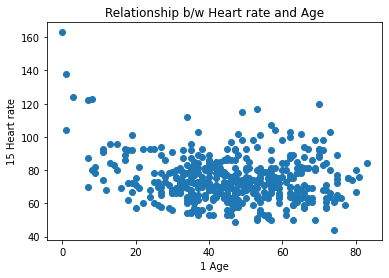

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df_test["1 Age"], df_test["15 Heart rate"])
plt.title("Relationship b/w Heart rate and Age")
plt.xlabel("1 Age")
plt.ylabel("15 Heart rate")

Text(0, 0.5, '280 Diagnosis')

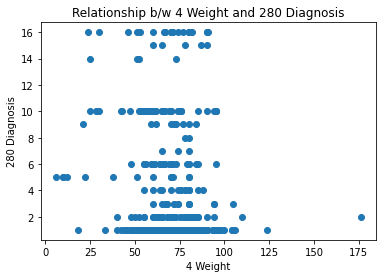

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df_test["4 Weight"], df_test["280 Diagnosis"])
plt.title("Relationship b/w 4 Weight and 280 Diagnosis")
plt.xlabel("4 Weight")
plt.ylabel("280 Diagnosis")

In [21]:
# Statistical Properties
df_test.describe()

1 Age        Male      Female    3 Height    4 Weight  \
count  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    46.471239    0.449115    0.550885  166.188053   68.170354   
std     16.466631    0.497955    0.497955   37.170340   16.590803   
min      0.000000    0.000000    0.000000  105.000000    6.000000   
25%     36.000000    0.000000    0.000000  160.000000   59.000000   
50%     47.000000    0.000000    1.000000  164.000000   68.000000   
75%     58.000000    1.000000    1.000000  170.000000   79.000000   
max     83.000000    1.000000    1.000000  780.000000  176.000000   

       5 QRS duration  6 P-R interval  7 Q-T interval  8 T interval  \
count      452.000000      452.000000      452.000000    452.000000   
mean        88.920354      155.152655      367.207965    169.949115   
std         15.364394       44.842283       33.385421     35.633072   
min         55.000000        0.000000      232.000000    108.000000   
25%         80.000000      142.000000      350.000000    148.000000   
50%         86.000000      157.000000      367.000000    162.000000   
75%         94.000000      175.000000      384.000000    179.000000   
max        188.000000      524.000000      509.000000    381.000000   

       9 P interval      10 QRS        11 T        12 P     13 QRST  \
count    452.000000  452.000000  452.000000  452.000000  452.000000   
mean      90.004425   33.676991   36.828998   50.157511   36.799698   
std       25.826643   45.431434   57.565384   29.146083   36.024547   
min        0.000000 -172.000000 -177.000000 -170.000000 -135.000000   
25%       79.000000    3.750000   14.000000   41.000000   12.000000   
50%       91.000000   40.000000   42.000000   56.000000   40.000000   
75%      102.000000   66.000000   65.000000   67.000000   62.000000   
max      205.000000  169.000000  179.000000  176.000000  166.000000   

       15 Heart rate  16 DI Q Wave  17 DI R wave  18 DI S wave  19 DI R'wave  \
count     452.000000    452.000000    452.000000    452.000000    452.000000   
mean       74.463415      5.628319     51.628319     20.920354      0.141593   
std        13.855298     10.650001     18.249901     20.541728      1.569483   
min        44.000000      0.000000      0.000000      0.000000      0.000000   
25%        65.000000      0.000000     40.000000      0.000000      0.000000   
50%        72.000000      0.000000     48.000000     20.000000      0.000000   
75%        81.000000     12.000000     60.000000     36.000000      0.000000   
max       163.000000     88.000000    156.000000     88.000000     24.000000   

       20 DI S'wave  21 DI Number of intrinsic deflections  \
count         452.0                             452.000000   
mean            0.0                              30.035398   
std             0.0                              10.046393   
min             0.0                               0.000000   
25%             0.0                              24.000000   
50%             0.0                              28.000000   
75%             0.0                              36.000000   
max             0.0                             100.000000   

       22 DI Existence of ragged R wave  \
count                        452.000000   
mean                           0.002212   
std                            0.047036   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                            0.000000   
max                            1.000000   

       23 DI Existence of diphasic derivation of R wave  \
count                                        452.000000   
mean                                           0.011062   
std                                            0.104708   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                          

In [22]:
# Applying data normalisation techniques on columns Height and weight
# Applying normalization Min-Max on Height column
df_test['3 Height']= (df_test['3 Height']-df_test['3 Height'].min())/(df_test['3 Height'].max() - df_test['3 Height'].min())

df_test['3 Height'].head()

0    0.125926
1    0.088889
2    0.099259
3    0.103704
4    0.125926
Name: 3 Height, dtype: float64

In [23]:
# Applying normalization Z-score on 5 QRS duration column
df_test['5 QRS duration'] = (df_test['5 QRS duration'] - df_test['5 QRS duration'].mean())/df_test['5 QRS duration'].std()
df_test['5 QRS duration'].head()

0    0.135355
1   -0.515501
2    3.194376
3    0.721125
4   -0.059902
Name: 5 QRS duration, dtype: float64

In [24]:
df_test.describe()
#df_test['4 Weight'].dtype

1 Age        Male      Female    3 Height    4 Weight  \
count  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    46.471239    0.449115    0.550885    0.090649   68.170354   
std     16.466631    0.497955    0.497955    0.055067   16.590803   
min      0.000000    0.000000    0.000000    0.000000    6.000000   
25%     36.000000    0.000000    0.000000    0.081481   59.000000   
50%     47.000000    0.000000    1.000000    0.087407   68.000000   
75%     58.000000    1.000000    1.000000    0.096296   79.000000   
max     83.000000    1.000000    1.000000    1.000000  176.000000   

       5 QRS duration  6 P-R interval  7 Q-T interval  8 T interval  \
count    4.520000e+02      452.000000      452.000000    452.000000   
mean     2.829595e-16      155.152655      367.207965    169.949115   
std      1.000000e+00       44.842283       33.385421     35.633072   
min     -2.207725e+00        0.000000      232.000000    108.000000   
25%     -5.805861e-01      142.000000      350.000000    148.000000   
50%     -1.900728e-01      157.000000      367.000000    162.000000   
75%      3.306115e-01      175.000000      384.000000    179.000000   
max      6.448653e+00      524.000000      509.000000    381.000000   

       9 P interval      10 QRS        11 T        12 P     13 QRST  \
count    452.000000  452.000000  452.000000  452.000000  452.000000   
mean      90.004425   33.676991   36.828998   50.157511   36.799698   
std       25.826643   45.431434   57.565384   29.146083   36.024547   
min        0.000000 -172.000000 -177.000000 -170.000000 -135.000000   
25%       79.000000    3.750000   14.000000   41.000000   12.000000   
50%       91.000000   40.000000   42.000000   56.000000   40.000000   
75%      102.000000   66.000000   65.000000   67.000000   62.000000   
max      205.000000  169.000000  179.000000  176.000000  166.000000   

       15 Heart rate  16 DI Q Wave  17 DI R wave  18 DI S wave  19 DI R'wave  \
count     452.000000    452.000000    452.000000    452.000000    452.000000   
mean       74.463415      5.628319     51.628319     20.920354      0.141593   
std        13.855298     10.650001     18.249901     20.541728      1.569483   
min        44.000000      0.000000      0.000000      0.000000      0.000000   
25%        65.000000      0.000000     40.000000      0.000000      0.000000   
50%        72.000000      0.000000     48.000000     20.000000      0.000000   
75%        81.000000     12.000000     60.000000     36.000000      0.000000   
max       163.000000     88.000000    156.000000     88.000000     24.000000   

       20 DI S'wave  21 DI Number of intrinsic deflections  \
count         452.0                             452.000000   
mean            0.0                              30.035398   
std             0.0                              10.046393   
min             0.0                               0.000000   
25%             0.0                              24.000000   
50%             0.0                              28.000000   
75%             0.0                              36.000000   
max             0.0                             100.000000   

       22 DI Existence of ragged R wave  \
count                        452.000000   
mean                           0.002212   
std                            0.047036   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                            0.000000   
max                            1.000000   

       23 DI Existence of diphasic derivation of R wave  \
count                                        452.000000   
mean                                           0.011062   
std                                            0.104708   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                          

<AxesSubplot:xlabel='280 Diagnosis', ylabel='4 Weight'>

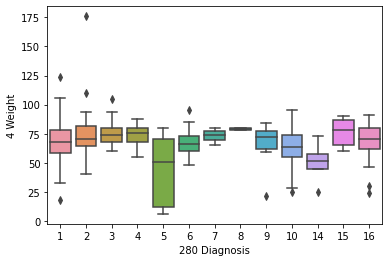

In [25]:
# Draw a boxplot for column 4 (Weight)

import seaborn as sns
sns.boxplot(x="280 Diagnosis", y = "4 Weight", data = df_test)

Text(0, 0.5, '280 Diagnosis')

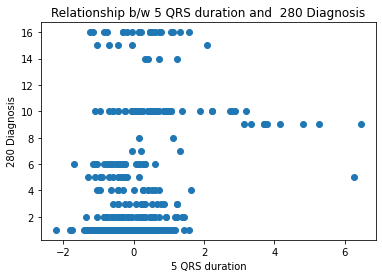

In [26]:
import matplotlib.pyplot as plt
plt.scatter(df_test["5 QRS duration"], df_test["280 Diagnosis"])
plt.title("Relationship b/w 5 QRS duration and  280 Diagnosis")
plt.xlabel("5 QRS duration")
plt.ylabel("280 Diagnosis")

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df_test['P-R_interval','Q-T_interval','T_interval','P_interval','QRS','T','P','QRST','J','heart_rate'], df_test["280 Diagnosis"])
plt.title("Relationship b/w 15 Heart rate and  280 Diagnosis")
plt.xlabel("15 Heart rate")
plt.ylabel("280 Diagnosis")



KeyError: ('P-R_interval', 'Q-T_interval', 'T_interval', 'P_interval', 'QRS', 'T', 'P', 'QRST', 'J', 'heart_rate')

In [ ]:
#!pip install scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
# X represetns features, Y target variable
X = df_test[["5 QRS duration", "6 P-R interval", "7 Q-T interval", "8 T interval", "9 P interval", "10 QRS", "11 T", "12 P", "13 QRST", "15 Heart rate", "279 V6 QRSTA"]]
Y = df_test["280 Diagnosis"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape, x_test.shape

In [ ]:
# Import Logistic Model from scikit-learn
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Object
logistic_model = LogisticRegression(max_iter = 10000)


In [ ]:
# Model fit
logistic_model.fit(x_train,y_train)

In [ ]:
print("c_0 = ", logistic_model.intercept_)
print("c_{1-11} = ", logistic_model.coef_)

In [ ]:
logistic_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
# Mean Squared Error (MSE) for Training Set (In-sample MSE)
Y_hat = logistic_model.predict(x_train)
mean_squared_error(y_train, Y_hat)

In [ ]:
from sklearn.metrics import mean_squared_error
# Mean Squared Error (MSE) for Test Set (Out-of-sample MSE)
Y_test_pred = logistic_model.predict(x_test)
mean_squared_error(y_test, Y_test_pred)

In [ ]:
# Calculating R^2 of training test
from sklearn.metrics import r2_score
y_train_pred = logistic_model.predict(x_train)
r2_score(y_train, y_train_pred)

In [ ]:
# Calculating R^2 of test test
from sklearn.metrics import r2_score

y_test_pred = logistic_model.predict(x_test)
r2_score(y_test, y_test_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic_model, X, Y, cv=10)

In [ ]:
scores  #all R^2 values  #Values are based on test_set

In [ ]:
np.mean(scores)